<a href="https://colab.research.google.com/github/pravsels/paligemma_from_scratch/blob/main/buffer_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

In [ ]:
import torch
import torch.nn as nn
from torchviz import make_dot

In [ ]:
class SuperSimpleModel(nn.Module):
   class_tensor = torch.tensor([4, 5, 6])  # Class attribute

   def __init__(self):
        super().__init__()
        self.instance_tensor = torch.tensor([7, 8, 9])  # Instance attribute
        self.register_buffer('buffer_tensor', torch.tensor([10, 11, 12]))

        self.default_param = nn.Parameter(torch.randn(3))

   def forward(self, x):
        inline_tensor = torch.tensor([13, 14, 15])

        result = x + self.class_tensor * 2 +  \
            self.instance_tensor * 2 +    \
            self.buffer_tensor * 2 +    \
            inline_tensor * 2 + self.default_param

        return result

In [ ]:
x = torch.tensor([1, 2, 3])

model = SuperSimpleModel()

y = model(x)

In [ ]:
model.state_dict()

OrderedDict([('default_param', tensor([ 2.5013, -0.2699,  0.4947])),
             ('buffer_tensor', tensor([10, 11, 12]))])

In [ ]:
# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

print('listing params : ')
for name, param in model.named_parameters():
    print(name, param.shape)

Total parameters: 3
listing params : 
default_param torch.Size([3])


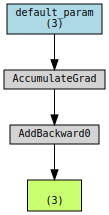

In [ ]:
make_dot(y, params=dict(model.named_parameters()))

In [ ]:
class SimpleModel(nn.Module):
   class_tensor = torch.tensor([4, 5, 6])  # Class attribute

   def __init__(self):
        super().__init__()
        self.instance_tensor = torch.tensor([7, 8, 9])  # Instance attribute
        self.register_buffer('buffer_tensor', torch.tensor([10, 11, 12]))

        self.default_param = nn.Parameter(torch.randn(3))

        # Added layers
        self.conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
        self.linear = nn.Linear(16, 3)  # Output size 3 to match other tensors

   def forward(self, x):
        inline_tensor = torch.tensor([13, 14, 15])

        # Process through conv and linear
        x = self.conv(x)  # Expects x shape: [batch, 3, H, W]
        x = x.mean(dim=[2,3])  # Global average pooling to reduce spatial dims
        x = self.linear(x)  # To match size of other tensors

        result = x + self.class_tensor * 2 +  \
            self.instance_tensor * 2 +    \
            self.buffer_tensor * 2 +    \
            inline_tensor * 2 + self.default_param

        return result

In [ ]:
x = torch.randn(1, 3, 32, 32)  # [batch=1, channels=3, height=32, width=32]
x = x.float()

model = SimpleModel()

y = model.forward(x)

In [ ]:
model.state_dict()

OrderedDict([('default_param', tensor([ 0.8787, -0.8073,  0.6710])),
             ('buffer_tensor', tensor([10, 11, 12])),
             ('conv.weight',
              tensor([[[[-1.2175e-01,  1.8980e-01, -1.3006e-01],
                        [ 9.1079e-02,  7.3207e-02,  1.4001e-01],
                        [ 8.6133e-02, -6.9317e-03,  1.5753e-01]],
              
                       [[-1.8307e-01,  1.7288e-02,  1.0325e-01],
                        [ 1.0669e-02,  1.1352e-01, -2.5215e-02],
                        [-5.1842e-02, -1.6308e-02,  9.2067e-03]],
              
                       [[-1.7288e-01,  7.0757e-02,  6.2713e-02],
                        [ 5.7581e-02, -1.2314e-01, -3.6668e-02],
                        [-9.9316e-02,  1.3665e-01, -4.5963e-02]]],
              
              
                      [[[ 1.7256e-01, -1.6920e-01, -1.7107e-01],
                        [-1.0477e-01,  2.6244e-02, -1.0988e-01],
                        [ 8.2875e-02, -1.7794e-01,  1.8268e-01]],
   

In [ ]:
# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

print('listing params : ')
for name, param in model.named_parameters():
    print(name, param.shape)

Total parameters: 502
listing params : 
default_param torch.Size([3])
conv.weight torch.Size([16, 3, 3, 3])
conv.bias torch.Size([16])
linear.weight torch.Size([3, 16])
linear.bias torch.Size([3])


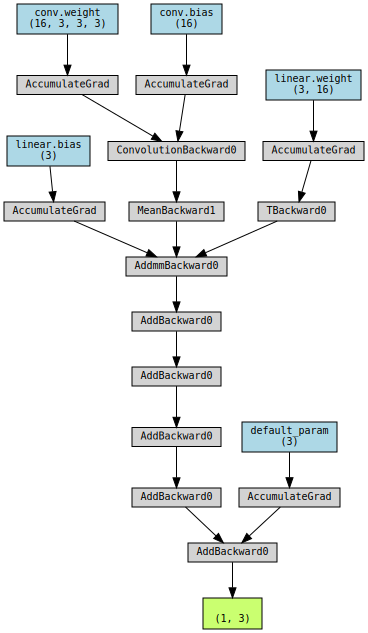

In [ ]:
make_dot(y, params=dict(model.named_parameters()))